In [122]:
import pandas as pd

ochag = pd.read_csv('Очаг.csv')
hdr =  pd.read_csv('Гидроторакс.csv')
pnv =  pd.read_csv('Снижение пневматизации.csv')

### Задачи

**№1-2**  
Придумать методологию поиска врачей с самыми ненадежными диагнозами, найти самых ненадежный врачей и визуализировать результаты

**№3-4**   
Поставить диагноз на основе мнений врачей, придумать метрику точности постановки диагноза и подсчитать ее для каждой болезни

## Очаг

### №1-2

Для оценки качества разметки отдельного врача я решила использовать усредненную долю несходящихся диагнозов одного врача с другими - мера несхожести выводов врачей, которая рассчитывается так: 

$\overline{(\sum(doc_i - doc_j)^2)/477}$ 

Мы возводим вектор разности векторов диагнозов друх врачей в квадрат (чтобы -1 и 1 не возмещали друг друга), делим на длину векторов диагнозов  - так получаем долю несошедшихся диагнозов, а потом усредняем полученные доли по остальным 14 врачам для каждого.                                               
Можно провести аналогию с accuracy - тут расчитывается доля "правильных" диагнозов по сравнению с другим врачом.
Эта мера интуитивна и легко интерепретируется и кажется более уместной по сравнению с другими измерениями схожести векторов (например, косинусное расстояние), сложно интерепретируемой ковариацей или нормализованной ковариацией - корреляцией (линейная взаимосвязь может рассказать мало интересного о бинарных данных).

In [72]:
data = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in ochag.drop(['ID Файла'], axis = 1).columns:
    data[i] = []
    for j in ochag.drop(['ID Файла'], axis = 1).columns:
        data[i].append(((ochag[i] - ochag[j])**2).sum()/len(ochag['Врач№1']))
dataf = pd.DataFrame(data, index = ochag.drop(['ID Файла'], axis = 1).columns)

In [77]:
dataf['mean'] = dataf.loc[:, 'Врач№1':'Врач№15'].sum(axis = 1)/14 # усредняем для каждого врача

In [81]:
dataf

,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15,mean
Врач№1,0.000000,0.199161,0.083857,0.142558,0.085954,0.127883,0.142558,0.144654,0.100629,0.092243,0.106918,0.125786,0.083857,0.085954,0.241090,0.125936
Врач№2,0.199161,0.000000,0.220126,0.224319,0.226415,0.247379,0.270440,0.251572,0.228512,0.194969,0.226415,0.190776,0.211740,0.213836,0.272537,0.227014
Врач№3,0.083857,0.220126,0.000000,0.117400,0.064990,0.157233,0.113208,0.094340,0.067086,0.100629,0.073375,0.129979,0.046122,0.073375,0.262055,0.114555
Врач№4,0.142558,0.224319,0.117400,0.000000,0.127883,0.169811,0.176101,0.144654,0.121593,0.117400,0.140461,0.134172,0.125786,0.153040,0.266247,0.154388
Врач№5,0.085954,0.226415,0.064990,0.127883,0.000000,0.167715,0.127883,0.100629,0.073375,0.098532,0.092243,0.144654,0.069182,0.088050,0.285115,0.125187
Врач№6,0.127883,0.247379,0.157233,0.169811,0.167715,0.000000,0.215933,0.213836,0.157233,0.153040,0.171908,0.169811,0.157233,0.167715,0.251572,0.180593
Врач№7,0.142558,0.270440,0.113208,0.176101,0.127883,0.215933,0.000000,0.140461,0.134172,0.155136,0.111111,0.167715,0.134172,0.140461,0.278826,0.164870
Врач№8,0.144654,0.251572,0.094340,0.144654,0.100629,0.213836,0.140461,0.000000,0.123690,0.148847,0.104822,0.169811,0.102725,0.129979,0.306080,0.155436
Врач№9,0.100629,0.228512,0.067086,0.121593,0.073375,0.157233,0.134172,0.123690,0.000000,0.092243,0.094340,0.125786,0.075472,0.094340,0.253669,0.124438
Врач№10,0.092243,0.194969,0.100629,0.117400,0.098532,0.153040,0.155136,0.148847,0.092243,0.000000,0.123690,0.100629,0.100629,0.115304,0.228512,0.130129


_Визуализация долей_                         
На этой тепловой карте на пересечении двух врачей можно увидеть долю несходящихся у них диагнозов, окрашенные синим доли - низкие, красные - наоборот, высокие

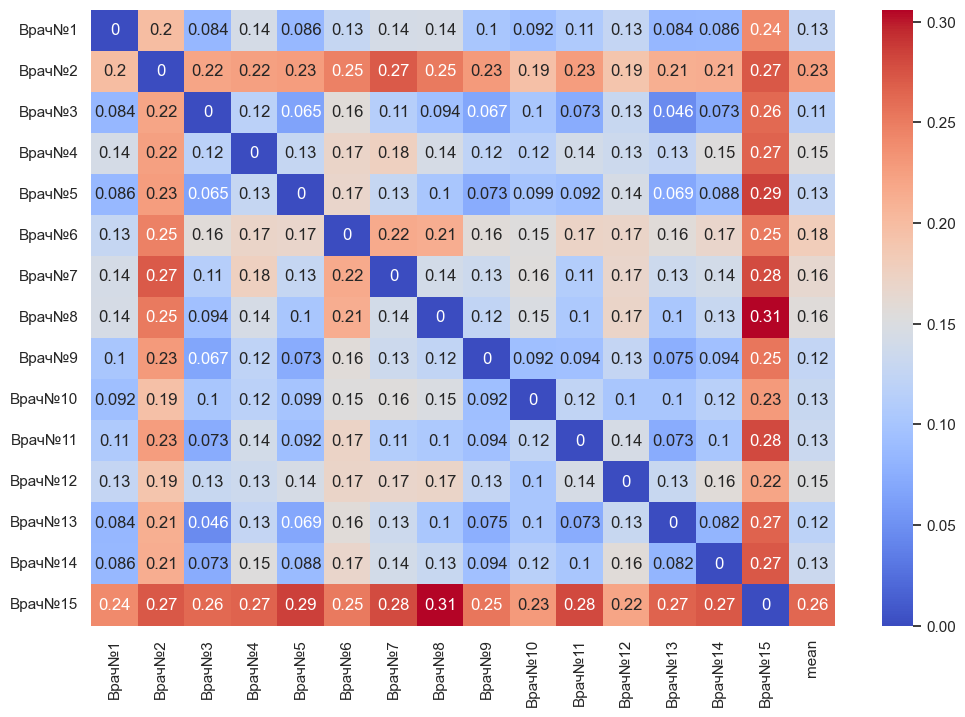

In [171]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(dataf, cmap='coolwarm', annot = True);

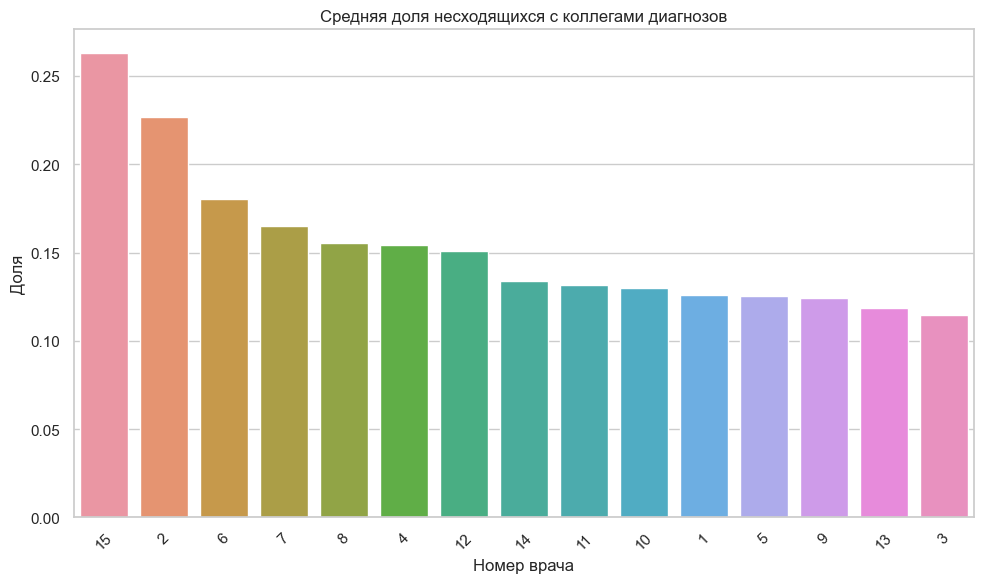

In [159]:
import matplotlib.pyplot as plt
data_fs = dataf.sort_values(by='mean', ascending=False) # сортируем, чтобы столбики были в порядке убывания 

doc = []
for i in data_fs.index: # сохраняем отдельно отсортированные индексы, чтобы потом расставить их по оси Х
    doc.append(i[i.find('№')+1:])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=doc, y='mean', data=data_fs)
plt.title('Средняя доля несходящихся с коллегами диагнозов')
plt.xlabel('Номер врача')
plt.ylabel('Доля')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Наименее успешными в диагностике врачами будут считаться те, у кого видны максимальные систематические различия в диагностике с остальными врачами. Это врачи 2 и 15 - на хитмэпе видны 2 красные линии, показывающие, что у этих врачей чаще остальных расходятся диагнозы с другими врачами. В среднем у них не сходятся 22% и 26% диагнозов соотсветственно - в этом они являются лидерами среди остальных, что видно на графике сверху.                              
Стоит также обратить внимание на врача №6 - у него в среднем не сходятся 19% диагнозов, но эти несходства менее систематичны.

In [185]:
print(ochag['Врач№1'].value_counts(), '\n'+'\n',
      ochag['Врач№2'].value_counts(), '\n'+'\n',
      ochag['Врач№15'].value_counts())

0    427
1     50
Name: Врач№1, dtype: int64 

 0    364
1    113
Name: Врач№2, dtype: int64 

 0    336
1    141
Name: Врач№15, dtype: int64


Сравнивая врачей 2 и 15 с 1 врачом можно увидеть, что у врачей 2 и 15  в 2-3 раза больше положительных диагнозов, притом доля несогласованных ответов у 2 и 15 все равно высокая - то есть, они чаще ставят положительный диагноз, но делают это для разных пациентов

### №3-4

Для принятия решения о наличии патологии или ее отсутствии я буду использовать биномиальный тест. С его помощью проверяется гипотеза о равенстве вероятности успеха (в нашем случае, вероятность, что врач сделает вывод о наличии патологии) определенному значению (которые я буду перебирать). Диагностика тут представлется как серия испытаний Бернулли с фиксированной вероятностью успеха - то есть, все врачи с равной вероятностью будут делать вывод о наличии патологии - что не очень правдоподобно, но допустимо.

Я сохраняю в список вероятности 'успеха' от 0 до 1 с шагом в 0.5, потом для каждого наблюдения (ID Файла) я провожу биномиальный тест с правосторонней альтернативой, где проверяется следуюущая гипотеза:

$H_0: p = a_j$                   

$H_0: p > a_j$

Программа перебирает разные пороги, пока p-value не станет выше уровня значимости (0.1), что будет означать, что с 90%-ой вероятность доля врачей, указавших на наличие патологии, не выше указанного порога и принадлежит отрезку (порог - 0.5, порог).                    
Если вероятность успеха выше 0.5, то мы говорим о наличии патологии с уверенностью, равной этой доле - это значит, что классификация врачей статистически значимо отличается от случайного классификатора (например, подбрасывния монетки). Если вероятность ниже 0.5 мы говорим об отсутствии патологии с уверенностью  = 1 - доля.

Потом я добавляю получившиеся значения в датасет:                                                   
*itog* - это вероятность, что врач сделает вывод о наличии патологии по файлу                                        
*diag* - итоговая разметка - 0 или 1                                                                
*conf* - уровень уверенности в разметке

P. S. еще думала удалить "ненадежных" врачей из классификации, качество получилось бы получше, но решила не делать так, потому что ничего не знаю ни об их опыте, ни об их квалификации

In [245]:
part = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
# доли, гипотезу о равенстве которым будем проверять

In [268]:
p_values = {}
for i in range(ochag.index[0], ochag.index[-1]+1): # перебор файлов
    for j in part: # перебор порогов
        if st.binom_test(x = ochag.drop('ID Файла', axis = 1).loc[i].sum(), n = 15, p = j, alternative = "greater") > 0.1:
            # если p-value > 0.1 прекращаем перебор и сохраняем порог в словарь
            p_values[i] = [j] 
            break

In [269]:
pd.DataFrame(p_values)

,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
0,0.05,0,0.05,0,0.1,0.05,0,0.05,0,0,...,0,0,0.05,0,0,0,0.15,0,0,0.05


In [270]:
ochag['itog'] = pd.DataFrame(p_values).loc[0]

Большая часть случаев имеет вероятность успеха ниже 0.5, притом есть неоднозначные случаи с порогами выше 0.3

In [272]:
ochag['itog'].value_counts()

0.00    220
0.05    150
0.10     27
0.15     20
0.35     13
0.30     11
0.20     10
0.25     10
0.55      7
0.65      3
0.45      2
0.50      2
0.70      1
0.90      1
Name: itog, dtype: int64

In [279]:
ochag['diag'] = ochag['itog'].apply(lambda x: 1 if x >= 0.5 else 0) # сохраняем итоговую разметку в отдельный столбец
# если вероятсность "успеха" равна или выше 0.5 - есть патология 

In [281]:
ochag['conf'] = ochag['itog'].apply(lambda x: x if x >= 0.5 else (1 - x)) # сохраняем уверенность в разметке в столбце датасета

Обновленный датасет:

In [285]:
ochag

,ID Файла,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15,itog,diag,conf
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.05,0,0.95
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00
2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.05,0,0.95
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00
4,4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0.10,0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00
473,473,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0.15,0,0.85
474,474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00
475,475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00


Качество разметки я буду измерять как усредненный уровень уверенности в разметке файлов. По этой патологии качество получилось = 0.93.                                                                          
Такой высокий показатель обеспечивается большим количеством нулей, с классификацией более малочисленного класса наверняка все не так хорошо. И порог в 0.5, который я выбрала, очень условный и вряд ли имеет отношение к медицине, где любые отличия от нуля должны быть поводом для дополнительных обследований. Но с метриками уверенности, которые я выбрала - назначение всего отличного от 0 с уверенность в 5% или 10% плохо бы сказалось на показателе качества разметки.

In [286]:
ochag['conf'].mean()

0.9328092243186554

## Снижение пневматизации

Я буду использовать те же метрики и процедуры, что в предыдущем пункте

### №1-2

In [137]:
data_p = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in pnv.drop(['ID Файла'], axis = 1).columns:
    data_p[i] = []
    for j in pnv.drop(['ID Файла'], axis = 1).columns:
        data_p[i].append(((pnv[i] - pnv[j])**2).sum()/len(pnv['Врач№1']))
data_pf = pd.DataFrame(data_p, index = pnv.drop(['ID Файла'], axis = 1).columns)

In [138]:
data_pf['mean'] = data_pf.loc[:, 'Врач№1':'Врач№15'].sum(axis = 1)/14

In [139]:
data_pf

,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15,mean
Врач№1,0.000000,0.136268,0.148847,0.146751,0.142558,0.182390,0.155136,0.186583,0.127883,0.155136,0.190776,0.215933,0.155136,0.150943,0.117400,0.157981
Врач№2,0.136268,0.000000,0.096436,0.140461,0.119497,0.213836,0.111111,0.159329,0.155136,0.153040,0.201258,0.222222,0.203354,0.161426,0.094340,0.154837
Врач№3,0.148847,0.096436,0.000000,0.153040,0.132075,0.222222,0.140461,0.167715,0.146751,0.165618,0.197065,0.226415,0.199161,0.165618,0.127883,0.163522
Врач№4,0.146751,0.140461,0.153040,0.000000,0.138365,0.190776,0.142558,0.190776,0.140461,0.155136,0.199161,0.203354,0.167715,0.176101,0.134172,0.162773
Врач№5,0.142558,0.119497,0.132075,0.138365,0.000000,0.190776,0.155136,0.190776,0.136268,0.171908,0.194969,0.215933,0.171908,0.163522,0.134172,0.161276
Врач№6,0.182390,0.213836,0.222222,0.190776,0.190776,0.000000,0.236897,0.272537,0.159329,0.190776,0.188679,0.226415,0.165618,0.169811,0.194969,0.200359
Врач№7,0.155136,0.111111,0.140461,0.142558,0.155136,0.236897,0.000000,0.132075,0.157233,0.159329,0.215933,0.257862,0.226415,0.188679,0.113208,0.170860
Врач№8,0.186583,0.159329,0.167715,0.190776,0.190776,0.272537,0.132075,0.000000,0.205451,0.215933,0.230608,0.276730,0.266247,0.232704,0.153040,0.205750
Врач№9,0.127883,0.155136,0.146751,0.140461,0.136268,0.159329,0.157233,0.205451,0.000000,0.161426,0.184486,0.201258,0.157233,0.148847,0.169811,0.160827
Врач№10,0.155136,0.153040,0.165618,0.155136,0.171908,0.190776,0.159329,0.215933,0.161426,0.000000,0.211740,0.190776,0.163522,0.205451,0.155136,0.175352


_Визуализации качества разметки врачей_

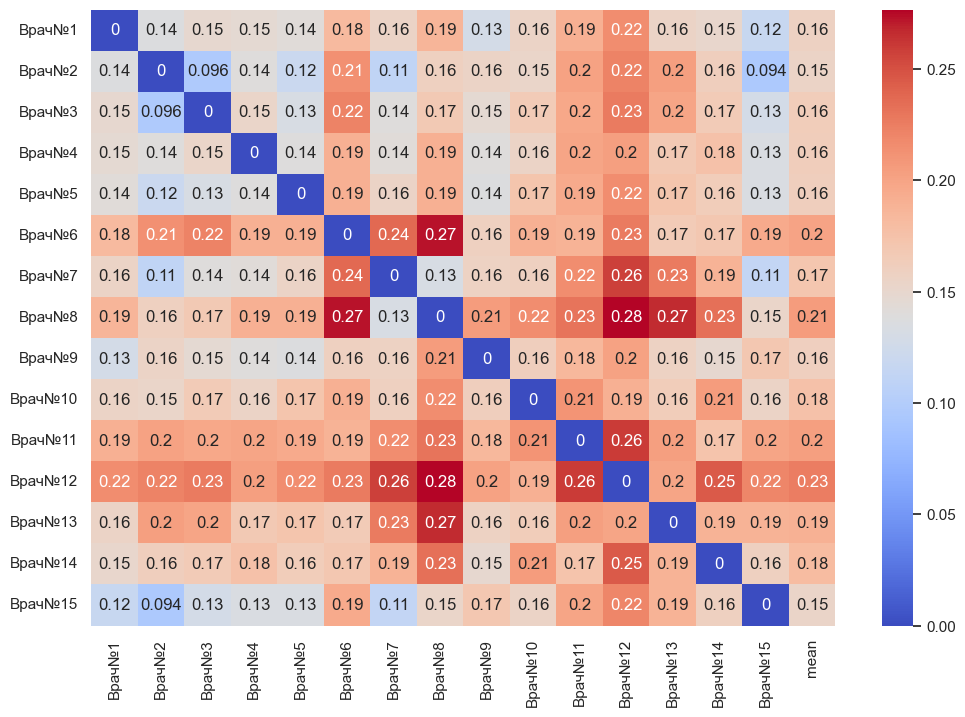

In [168]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_pf, cmap='coolwarm', annot = True);

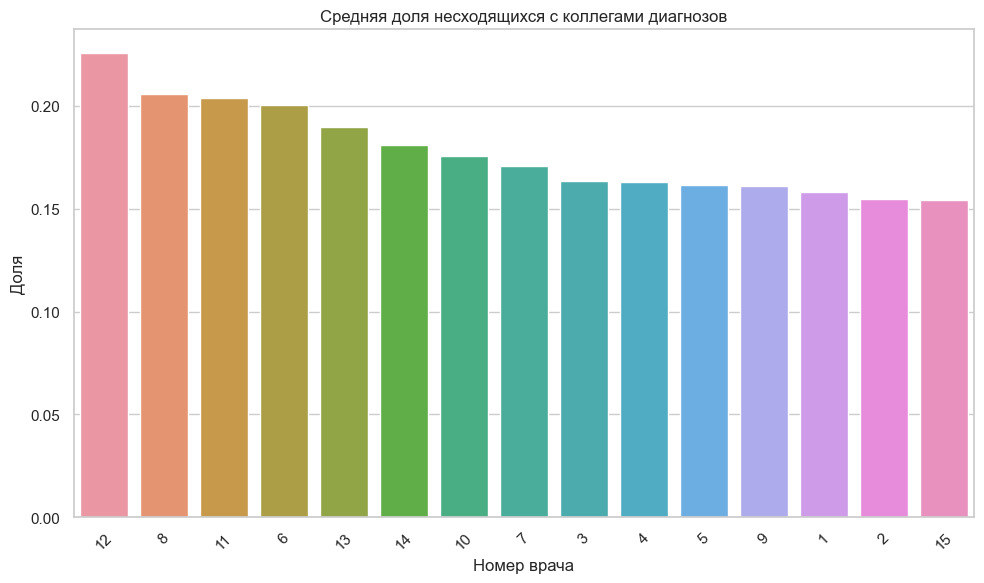

In [162]:
data_pfs = data_pf.sort_values(by='mean', ascending=False)

doc = []
for i in data_pfs.index:
    doc.append(i[i.find('№')+1:])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=doc, y='mean', data=data_pfs)
plt.title('Средняя доля несходящихся с коллегами диагнозов')
plt.xlabel('Номер врача')
plt.ylabel('Доля')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Наименее неуспешными врачами однозначно кажутся 11, 12 и 6 - у них самые высокие доли несходящихся диагнозов и это происходит наиболее систематическию. У 8 высокое среднее за счет большого несходства с результатами ненадежных врачей - несходимости не несут менее систематический характер. 

### №3-4

In [287]:
p_values = {}
for i in range(pnv.index[0], pnv.index[-1]+1):
    for j in part:
        if st.binom_test(x = pnv.drop('ID Файла', axis = 1).loc[i].sum(), n = 15, p = j, alternative = "greater") > 0.1:
            p_values[i] = [j]
            break

pd.DataFrame(p_values)
pnv['itog'] = pd.DataFrame(p_values).loc[0]
pnv['itog'].value_counts()

0.00    221
0.05    110
0.10     24
0.20     19
0.15     18
0.50     18
0.25     16
0.35     11
0.65     10
0.30     10
0.55      9
0.45      9
0.70      1
0.80      1
Name: itog, dtype: int64

In [288]:
pnv['diag'] = pnv['itog'].apply(lambda x: 1 if x >= 0.5 else 0)
pnv['conf'] = pnv['itog'].apply(lambda x: x if x >= 0.5 else (1 - x))

Все посчитала так же, как с очагами, вот обновленный датасет:

In [297]:
pnv

,ID Файла,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15,itog,diag,conf
0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0.15,0,0.85
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.05,0,0.95
2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,0,0.95
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00
4,4,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0.10,0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,472,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.05,0,0.95
473,473,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0.10,0,0.90
474,474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00
475,475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00


In [291]:
pnv.diag.value_counts()

0    438
1     39
Name: diag, dtype: int64

Тут чуть больше неоднозначных случаев, качество получилось 0.9

In [289]:
pnv['conf'].mean()

0.9028301886792436

## Гидроторакс

## №1-2

In [163]:
data_h = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in hdr.drop(['ID Файла'], axis = 1).columns:
    data_h[i] = []
    for j in hdr.drop(['ID Файла'], axis = 1).columns:
        data_h[i].append(((hdr[i] - hdr[j])**2).sum()/len(hdr['Врач№1']))
data_hf = pd.DataFrame(data_h, index = hdr.drop(['ID Файла'], axis = 1).columns)

In [164]:
data_hf['mean'] = data_hf.loc[:, 'Врач№1':'Врач№15'].sum(axis = 1)/14

In [165]:
data_hf

,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15,mean
Врач№1,0.000000,0.157233,0.088050,0.106918,0.127883,0.232704,0.092243,0.113208,0.134172,0.092243,0.079665,0.085954,0.096436,0.090147,0.123690,0.115753
Врач№2,0.157233,0.000000,0.207547,0.117400,0.192872,0.176101,0.186583,0.224319,0.161426,0.132075,0.174004,0.117400,0.132075,0.125786,0.113208,0.158431
Врач№3,0.088050,0.207547,0.000000,0.148847,0.127883,0.278826,0.075472,0.062893,0.142558,0.121593,0.079665,0.119497,0.121593,0.111111,0.140461,0.130428
Врач№4,0.106918,0.117400,0.148847,0.000000,0.155136,0.197065,0.123690,0.153040,0.111111,0.119497,0.123690,0.079665,0.085954,0.083857,0.088050,0.120994
Врач№5,0.127883,0.192872,0.127883,0.155136,0.000000,0.213836,0.182390,0.165618,0.140461,0.153040,0.161426,0.150943,0.127883,0.159329,0.180294,0.159928
Врач№6,0.232704,0.176101,0.278826,0.197065,0.213836,0.000000,0.253669,0.278826,0.211740,0.207547,0.253669,0.192872,0.186583,0.205451,0.213836,0.221623
Врач№7,0.092243,0.186583,0.075472,0.123690,0.182390,0.253669,0.000000,0.088050,0.134172,0.117400,0.088050,0.098532,0.109015,0.090147,0.132075,0.126535
Врач№8,0.113208,0.224319,0.062893,0.153040,0.165618,0.278826,0.088050,0.000000,0.142558,0.129979,0.088050,0.132075,0.142558,0.123690,0.148847,0.142408
Врач№9,0.134172,0.161426,0.142558,0.111111,0.140461,0.211740,0.134172,0.142558,0.000000,0.117400,0.117400,0.098532,0.100629,0.127883,0.132075,0.133723
Врач№10,0.092243,0.132075,0.121593,0.119497,0.153040,0.207547,0.117400,0.129979,0.117400,0.000000,0.113208,0.090147,0.083857,0.085954,0.098532,0.118748


_Визуализация качества врачебной разметки_

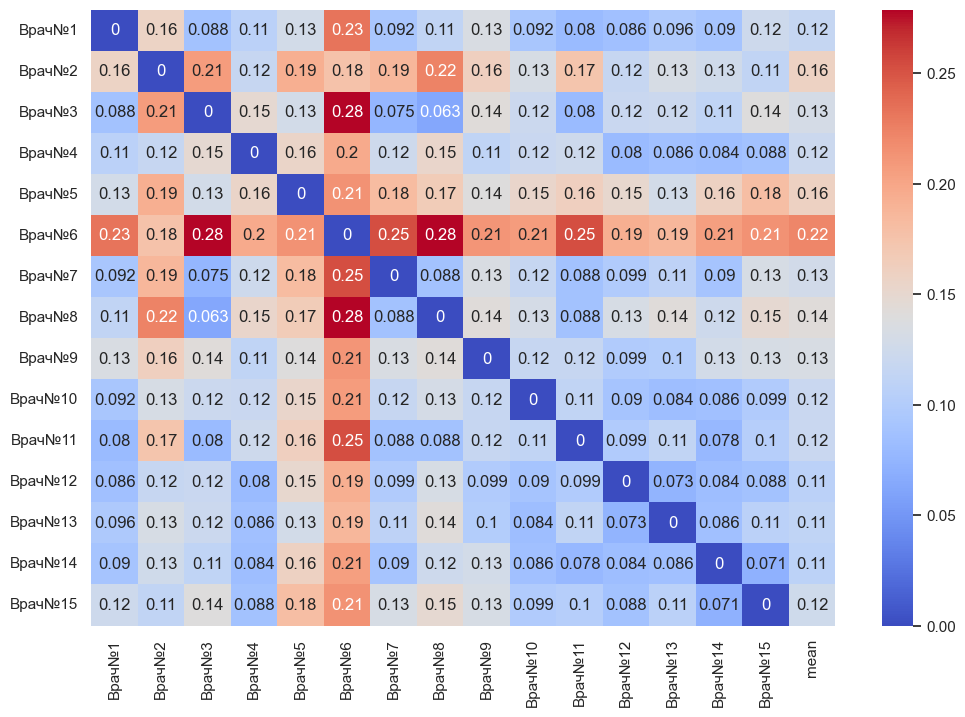

In [167]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_hf, cmap='coolwarm', annot = True);

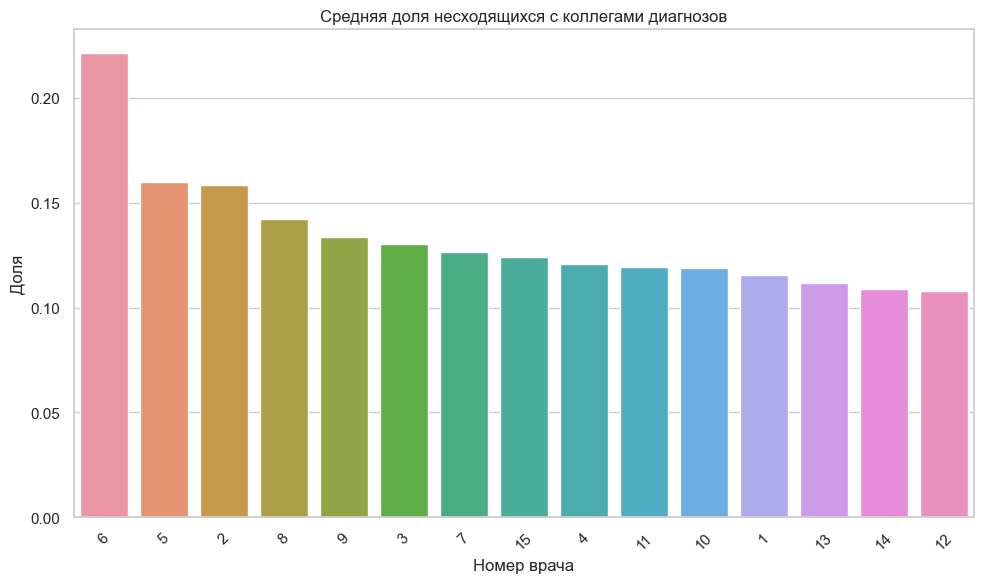

In [174]:
data_hfs = data_hf.sort_values(by='mean', ascending=False)

doc = []
for i in data_hfs.index:
    doc.append(i[i.find('№')+1:])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=doc, y='mean', data=data_hfs)
plt.title('Средняя доля несходящихся с коллегами диагнозов')
plt.xlabel('Номер врача')
plt.ylabel('Доля')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Здесь на фоне остальных выделяется врач №6, у него единственного средняя доля несходящихся диагнозов выше 0.2

## №3-4

In [292]:
p_values = {}
for i in range(hdr.index[0], hdr.index[-1]+1):
    for j in part:
        if st.binom_test(x = hdr.drop('ID Файла', axis = 1).loc[i].sum(), n = 15, p = j, alternative = "greater") > 0.1:
            p_values[i] = [j]
            break

pd.DataFrame(p_values)
hdr['itog'] = pd.DataFrame(p_values).loc[0]
hdr['itog'].value_counts()

0.00    256
0.05     99
0.10     20
0.50     14
0.55     11
0.45     11
0.15     10
0.20      8
0.25      8
0.80      8
0.35      7
0.90      7
0.30      6
0.70      6
0.65      6
Name: itog, dtype: int64

In [293]:
hdr['diag'] = hdr['itog'].apply(lambda x: 1 if x >= 0.5 else 0)
hdr['conf'] = hdr['itog'].apply(lambda x: x if x >= 0.5 else (1 - x))

In [294]:
hdr.diag.value_counts()

0    425
1     52
Name: diag, dtype: int64

Все посчитала так же , вот обновленный датасет:

In [295]:
hdr

,ID Файла,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15,itog,diag,conf
0,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0.55,1,0.55
1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.05,0,0.95
2,2,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0.20,0,0.80
3,3,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0.25,0,0.75
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,472,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.05,0,0.95
473,473,1,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0.35,0,0.65
474,474,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0.25,0,0.75
475,475,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,0.65,1,0.65


Качество разметки получилось 0.92 

In [296]:
hdr['conf'].mean()

0.9174004192872103